In [15]:
import qho_functions as qho

In [16]:
omega = 1.0 # Angular frequency
L = 5 # Range of x from -L to L
N = 1000  # Number of grid points
k = 8 # Number of eigenvalues

In [17]:
energies_2, wfc_2 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 2)
energies_4, wfc_4 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 4)
energies_6, wfc_6 = qho.harmonic_oscillator_spectrum(omega, L, N, order = 6)

print(f'First {k} eigenvalues for second order approximation:\n {energies_2[:k]}')
print(f'First {k} eigenvalues for fourth order approximation:\n {energies_4[:k]}')
print(f'First {k} eigenvalues for sixth order approximation:\n {energies_6[:k]}')

First 8 eigenvalues for second order approximation:
 [0.49999687 1.49998435 2.49995937 3.49992284 4.49988328 5.49990059
 6.50029586 7.50239486]
First 8 eigenvalues for fourth order approximation:
 [0.5        1.5        2.50000007 3.50000112 4.50001173 5.50009212
 6.50056519 7.50276344]
First 8 eigenvalues for sixth order approximation:
 [-54.9321538  -53.90746409 -52.88277962 -51.85809885 -50.83340771
 -49.80861109 -48.78322062 -47.75532011]


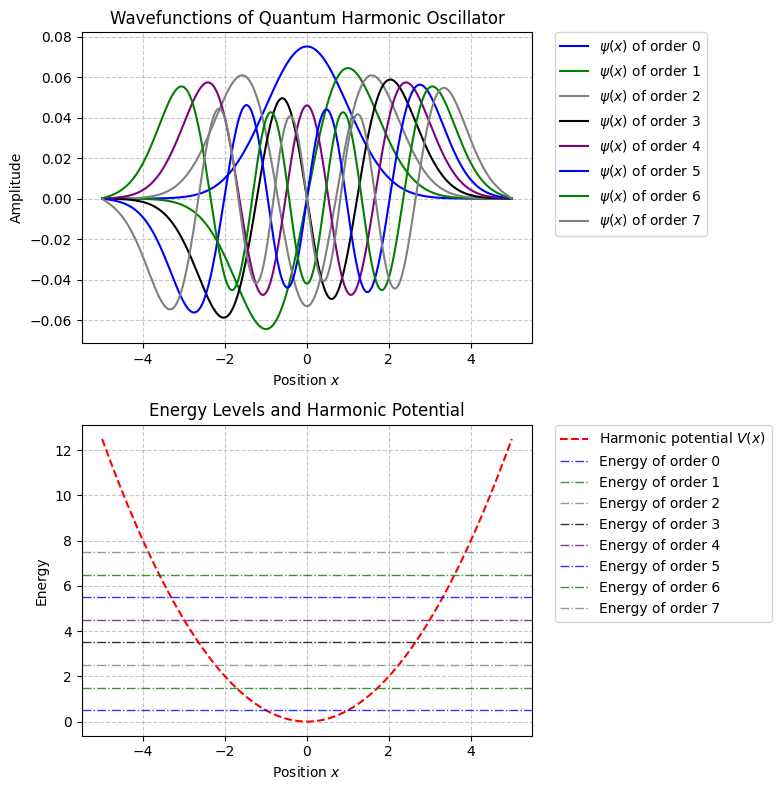

In [18]:
qho.plot_wf_en(omega, N, L, k, order=2)

# PROGRAM EVALUATION

### *Correctness*: comparison with analytical solution

In [19]:
L = 5
N = 1000
omega = 1
k = 8

In [22]:
import numpy as np
np.linspace(-L, L, N)

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

In [20]:
analytical_energies = [qho.harmonic_en(omega, k) for k in range(0, k)]
print(f'First {k} eigenvalues for analytical solution:\n {analytical_energies[:k]}')

First 8 eigenvalues for analytical solution:
 [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]


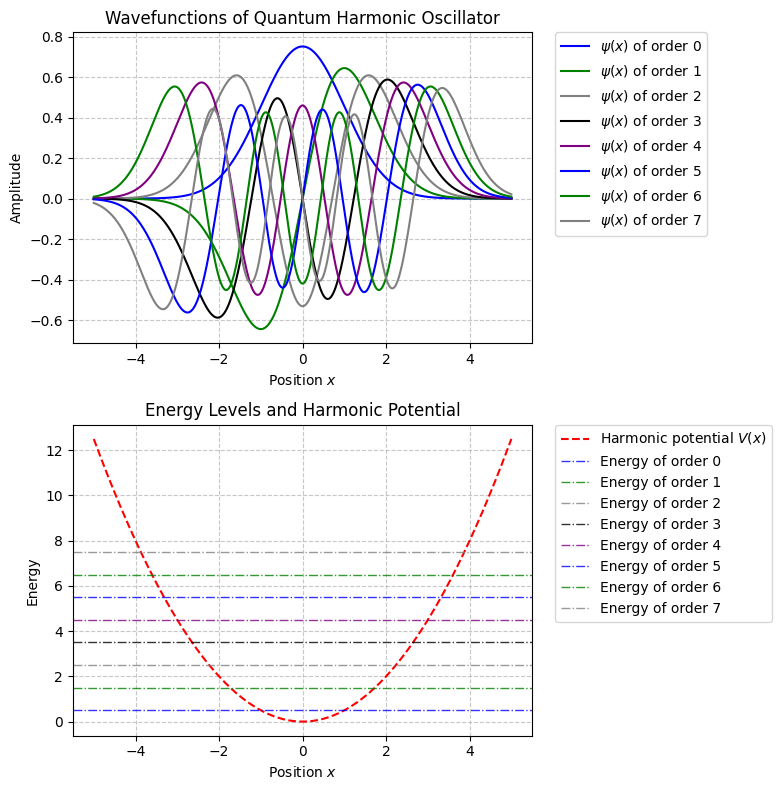

In [21]:
qho.plot_wf_en(omega, N, L, k)